### This assignment is following the instructions that provided by Dr. Bianco. 

It is finished by Yunhe Cui as an individual task (though I use "we" instead of "me").


# !!! Please run the Assignment_4_ec_prep.ipynb in a python3 environment before rerun this notebook!!!



### test if the distribution of 

#### 1) trip duration of bikers that ride during the day vs night

#### 2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)

are different. Use 3 tests: KS, Pearson's, Spearman's. 

Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 

For the KS do the test with the entire dataset and with a subset 200 times smaller

Choose a single significant threshold for the whole exercise. 

For each test phrase the Null Hypothesis in words.

Describe the return of the scipy function you use in each case.

State the result in terms of rejection of the Null.

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
import scipy.stats
import os
%pylab inline

# the getCitiBikeCSV is retrieved from Dr. Bianco's folder in repo PUI2018/HW06

Populating the interactive namespace from numpy and matplotlib


### Read in Data

In [3]:
# using the citibike data for 2015-02 (cold month) and 2018-08 (warm month)
datastring_1 = '201502'
getCitiBikeCSV(datastring_1)
datastring_2 = '201508'
getCitiBikeCSV(datastring_2)

('Downloading', '201502')
file in place, you can continue
('Downloading', '201508')
file in place, you can continue


In [4]:
!ls $PUIDATA
# files are now in the PUIDATA folder as listed

201502-citibike-tripdata.csv  201508-citibike-tripdata.csv  nyc_pluto_18v1.zip
201502-citibike-tripdata.zip  201508-citibike-tripdata.zip  PLUTO_for_WEB
201503-citibike-tripdata.csv  borough.csv		    time.csv
201503-citibike-tripdata.zip  drinking_water_quaity.csv


In [5]:
df_02 = pd.read_csv("%s/201502-citibike-tripdata.csv"%os.getenv("PUIDATA"))
df_08 = pd.read_csv("%s/201508-citibike-tripdata.csv"%os.getenv("PUIDATA"))


In [6]:
df = pd.concat([df_02, df_08])

In [7]:
print ("df_02 shape is {}".format(df_02.shape))
print ("df_08 shape is {}".format(df_08.shape))
print ("the combined df shape is {}".format(df.shape))

## Problem 1: trip duration of bikers that ride during the day vs night

#### Since we used the ridership data from Feb and Aug, the sunrise-sunset times are different at a large scale. In this case, we define the day time as 7am to 7pm and night time from 7pm to 7am of the following day.
H0: There is NO statistical difference in term of trip duration depending on time (day/night)   
Ha: There is statistical difference in term of trip duration depending on time (day/night)   
significance level α = 0.05

In [8]:
df['date'] = pd.to_datetime(df['starttime'])
df['hour'] = df['date'].dt.hour


In [9]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'hour'],
      dtype='object')

In [10]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,0
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,0


### split by category

In [11]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'hour'],
      dtype='object')

In [12]:
# drop redundant columns
df_c = df.drop([u'starttime', u'stoptime', u'start station name',u'end station name',u'bikeid',u'usertype',u'birth year', u'gender', u'date'], axis = 1)
df_c = df_c.reset_index()


In [13]:
# give the day/night attribute
df_c['dur_day'] = df_c['tripduration'][(df_c['hour']>4) & (df_c['hour']<=17)]
df_c['dur_night'] = df_c['tripduration'][(df_c['hour']<=4) | (df_c['hour']>17)]

In [14]:
df_c = df_c.iloc[:,1:]
#df_c

In [15]:
# get the description
df_c.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,hour,dur_day,dur_night
count,1.375974e+06,1.375974e+06,1.375974e+06,1.375974e+06,1.375974e+06,1.375974e+06,1.375974e+06,1.375974e+06,9.407120e+05,4.352620e+05
mean,9.647967e+02,5.072377e+02,4.073460e+01,-7.399066e+01,5.065809e+02,4.073431e+01,-7.399076e+01,1.411235e+01,9.618673e+02,9.711279e+02
std,7.248311e+03,5.216934e+02,1.943665e-02,1.329158e-02,5.222284e+02,1.946503e-02,1.330478e-02,4.905994e+00,6.025032e+03,9.361113e+03
min,6.000000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,4.067891e+01,-7.401713e+01,0.000000e+00,6.000000e+01,6.000000e+01
25%,4.000000e+02,3.070000e+02,4.072083e+01,-7.400026e+01,3.070000e+02,4.072066e+01,-7.400027e+01,1.000000e+01,NaN,NaN
50%,6.480000e+02,4.170000e+02,4.073625e+01,-7.399076e+01,4.150000e+02,4.073588e+01,-7.399076e+01,1.500000e+01,NaN,NaN
75%,1.087000e+03,4.950000e+02,4.075007e+01,-7.398192e+01,4.930000e+02,4.074972e+01,-7.398192e+01,1.800000e+01,NaN,NaN
max,2.842280e+06,3.224000e+03,4.077164e+01,-7.392989e+01,3.224000e+03,4.077706e+01,-7.392989e+01,2.300000e+01,2.842280e+06,2.712082e+06


In [16]:
#dropping the NaN value
df_c['dur_day'].dropna(inplace= True)
df_c['dur_night'].dropna(inplace= True)
df_c.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,hour,dur_day,dur_night
0,801,521,40.750450,-73.994811,423,40.765849,-73.986905,0,NaN,801.0
1,379,497,40.737050,-73.990093,504,40.732219,-73.981656,0,NaN,379.0
2,2474,281,40.764397,-73.973715,127,40.731724,-74.006744,0,NaN,2474.0
3,818,2004,40.724399,-74.004704,505,40.749013,-73.988484,0,NaN,818.0
4,544,323,40.692362,-73.986317,83,40.683826,-73.976323,0,NaN,544.0


### plot the data in histograms

In this case, we use 60 sec as a split bin. The maximum data is too large which could be considered as outliers. We could use 1 hour (3600 second) as the upper boundary of our dataset to show the trend of our data   
The histograms are as follow

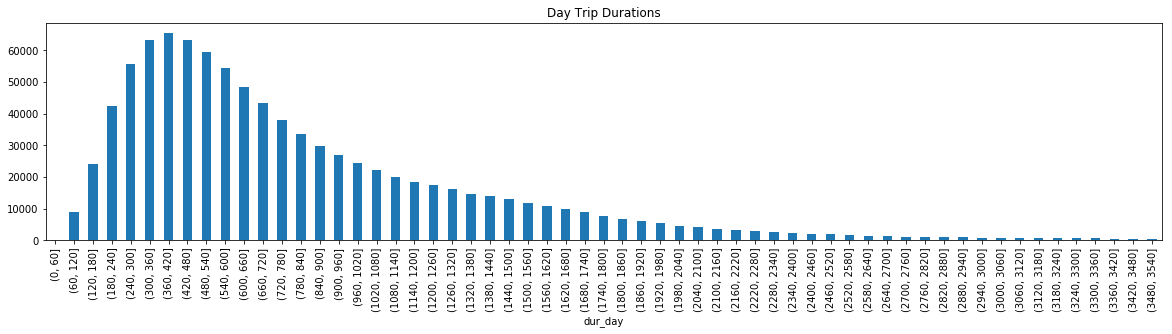

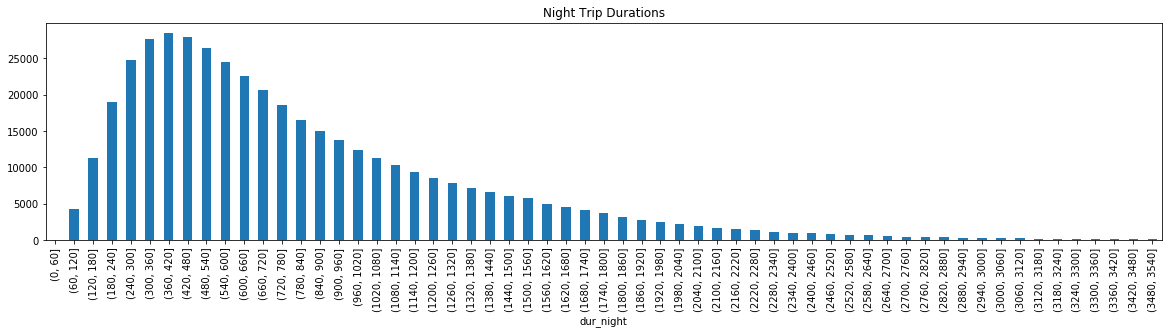

In [17]:
bins = np.arange(0, 3600, 60)

Day = df_c.dur_day.groupby(pd.cut(df_c.dur_day, bins)).agg([count_nonzero]).plot(kind='bar', figsize = (20,4),legend=False)
Day.set_title("Day Trip Durations")

Night = df_c.dur_night.groupby(pd.cut(df_c.dur_night, bins)).agg([count_nonzero]).plot(kind='bar',figsize = (20,4),legend=False)
Night.set_title("Night Trip Durations");

Figure1. This is a histogram of Day/Night citibike ride duration distribution. The raw data is from citibike 2015 Feb and Aug. We could see that the distribution of those day/night trip duration have similar positive skewed trend. However, the number of day ridership is more than 3 times of night ones.  

              count_nonzero
dur_day                    
(0, 60]            0.000034
(60, 120]          0.000421
(120, 180]         0.000379
(180, 240]         0.001482
(240, 300]         0.004094
(300, 360]         0.008454
(360, 420]         0.013158
(420, 480]         0.016803
(480, 540]         0.019675
(540, 600]         0.021944
(600, 660]         0.021938
(660, 720]         0.020884
(720, 780]         0.018889
(780, 840]         0.016611
(840, 900]         0.013794
(900, 960]         0.010778
(960, 1020]        0.008377
(1020, 1080]       0.006039
(1080, 1140]       0.003744
(1140, 1200]       0.001969
(1200, 1260]       0.000903
(1260, 1320]       0.000165
(1320, 1380]       0.000697
(1380, 1440]       0.000886
(1440, 1500]       0.000906
(1500, 1560]       0.001636
(1560, 1620]       0.001691
(1620, 1680]       0.001730
(1680, 1740]       0.001766
(1740, 1800]       0.002102
(1800, 1860]       0.002414
(1860, 1920]       0.002515
(1920, 1980]       0.002560
(1980, 2040]       0

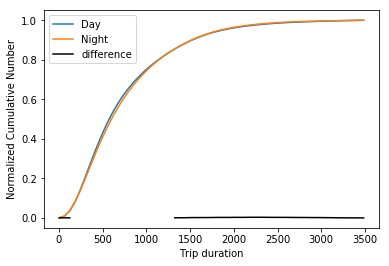

In [18]:
#print df.ageS, df.ageS.cumsum()

drd=df_c.dur_day.groupby(pd.cut(df_c.dur_day, bins)).agg([count_nonzero]).cumsum()

drn=df_c.dur_night.groupby(pd.cut(df_c.dur_night, bins)).agg([count_nonzero]).cumsum()

print (np.abs(drd / drd.max()- drn / drn.max()))

pl.plot(bins[:-1] + 5, drd / drd.max(), label = "Day")
pl.plot(bins[:-1] + 5, drn / drn.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(drn / drn.max() - drd / drd.max())**2, 'k-',label = "difference")
pl.xlabel("Trip duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

Figure2. This chart shows the normalized day/night citibike trip duration. It is clear that the difference between the distribution of them is very small. 

### 1.1-1 test to compare 2 samples
According to https://docs.scipy.org/doc/scipy0.15.1/reference/generated/scipy.stats.ks_2samp.html, If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same. Only the 2-sided test could be implemented. 

In [19]:
ks = scipy.stats.ks_2samp(df_c.dur_day, df_c.dur_night)
print (ks)

Ks_2sampResult(statistic=0.018471794972401773, pvalue=1.1750413436033721e-88)


#### We got p-value is extremely small (we could see it as 0) which is definitely smaller than 0.05 (our preset significance level). In this case, we COULD REJECT the Null hypothesis which is "There is NO statistical difference in term of trip duration depending on time (day/night)"

### 1.1-2 KS test w/ reduced dataset

In [20]:
df_r = df_c.sample(df_c['dur_day'].shape[0]/200, axis = 0)
df_r['dur_day'].dropna(inplace= True)
df_r['dur_night'].dropna(inplace= True)
ks_r = scipy.stats.ks_2samp(df_r.dur_day, df_r.dur_night)
print (ks_r)

Ks_2sampResult(statistic=0.037495473556037114, pvalue=0.1162020682930863)


#### In this case, we used a random sample which is selected from the dataset (sample size  200 times smaller). The p value is 0.2701 which is larger than 0.05. Thus, we could not reject the null hypothesis. 

The scipy.stats KS test already tells me the significance and the p-value.  
The next few cells are here just to show you how you would obtain the same result by hand, but they are not required.  
Remember: the Null hypothesis is rejected if  
$D_KS(n1,n2) &gt; c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$
(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!!  
http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/  
But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

### 1.2 Pearson's test for correlation
#### -> the following words are retrieved from scipy.org   
Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

### H0: There is NO correlation between Day&Night trip duration
significance level α = 0.05

In [21]:
# scipy.stats.pearsonr(x , y) x,y should be the same length
len_min = min(df_c['dur_day'].shape, df_c['dur_night'].shape)
len_min = len_min[0]

In [22]:
Day_reduced = np.sort(df_c['dur_day'].sample(n = len_min, axis = 0))
Night_reduced = np.sort(df_c['dur_night'].sample(n = len_min, axis = 0))

In [23]:
pearson = scipy.stats.pearsonr(Day_reduced,Night_reduced)
pearson

(0.90923071952558199, 0.0)

### The correlation coefficient of Pearson's test is 0.95966, which indicate a strong positive linear relationship. The p value is 0.0 and we could reject our null hypothesis. 

### 1.3 Spearman's test for correlation
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr  


In [24]:
# scipy.stats.spearmanr(a, b=None, axis=0, nan_policy='propagate')
spearman = scipy.stats.spearmanr(Day_reduced,Night_reduced)
spearman

SpearmanrResult(correlation=0.99999943462483676, pvalue=0.0)

### The returned value is the correlation coefficient and the corresponding p-value. The correlation coefficient of Spearman's test almost 1, which indicate a strong positive linear relationship. The p value is 0.0 and we could reject our null hypothesis. 

=======================================================================
## Problem 2: age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)

# !!! Please run the Assignment_4_ec_prep.ipynb in a python3 environment before rerun this notebook!!!


###  H0: There is no statistical difference in the age distribution of bikers in Manhattan and Brooklyn
 significance level p = 0.05

In [25]:
df['age'] = 2015 - df['birth year']
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,age
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,0,37.0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,0,22.0
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,0,46.0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,0,30.0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,0,58.0


In [26]:
!ls $PUIDATA

201501-citibike-tripdata.csv  201503-citibike-tripdata.zip  nyc_pluto_18v1.zip
201501-citibike-tripdata.zip  201508-citibike-tripdata.csv  PLUTO_for_WEB
201502-citibike-tripdata.csv  201508-citibike-tripdata.zip  time.csv
201502-citibike-tripdata.zip  borough.csv
201503-citibike-tripdata.csv  drinking_water_quaity.csv


In [27]:
borough = pd.read_csv("%s/borough.csv"%os.getenv("PUIDATA"))

In [28]:
borough.head()

,Latitude,Longitude,StationNam,boro_code,boro_name
0,40.767272,-73.993929,W 52 St & 11 Ave,1.0,Manhattan
1,40.719116,-74.006667,Franklin St & W Broadway,1.0,Manhattan
2,40.711174,-74.000165,St James Pl & Pearl St,1.0,Manhattan
3,40.683826,-73.976323,Atlantic Ave & Fort Greene Pl,3.0,Brooklyn
4,40.741776,-74.001497,W 17 St & 8 Ave,1.0,Manhattan


In [29]:
borough = borough.rename(columns = {'StationNam': 'start station name'})

In [30]:
df_b = pd.merge(df, borough, on='start station name')


In [31]:
df_b.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'hour', u'age',
       u'Latitude', u'Longitude', u'boro_code', u'boro_name'],
      dtype='object')

In [32]:
df_b = df_b.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'hour',
       u'Latitude', u'Longitude', u'boro_code'], axis = 1)

In [33]:
df_b.sort(['boro_name'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,tripduration,age,boro_name
968207,160,45.0,Brooklyn
403351,1147,29.0,Brooklyn
403350,161,53.0,Brooklyn
403349,539,52.0,Brooklyn
403348,555,56.0,Brooklyn
403347,220,43.0,Brooklyn
403346,176,29.0,Brooklyn
403345,238,41.0,Brooklyn
403344,312,41.0,Brooklyn
403343,376,30.0,Brooklyn


In [34]:
Df_Manh = df_b.loc[(df_b['boro_name'] == 'Manhattan')]
Df_Manh = Df_Manh.reset_index().iloc[:,1:]
Df_Manh.dropna(inplace = True)
Df_Manh.head()

,tripduration,age,boro_name
0,801,37.0,Manhattan
1,783,29.0,Manhattan
2,551,41.0,Manhattan
3,575,34.0,Manhattan
4,853,30.0,Manhattan


In [35]:
Df_Bkly = df_b.loc[(df_b['boro_name'] == 'Brooklyn')]
Df_Bkly = Df_Bkly.reset_index().iloc[:,1:]
Df_Bkly.dropna(inplace = True)
Df_Bkly.head()

,tripduration,age,boro_name
0,544,58.0,Brooklyn
1,175,35.0,Brooklyn
2,429,60.0,Brooklyn
3,264,36.0,Brooklyn
4,341,26.0,Brooklyn


### The above steps are linking borough name and citibike data based on the START station name. Then we cleaned the data for conducting the correlation.  


### Plot the data in histograms

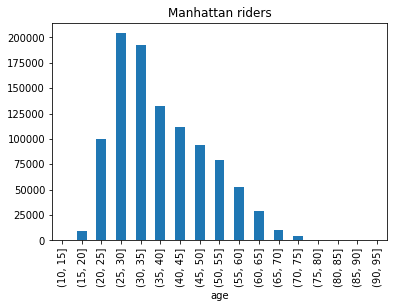

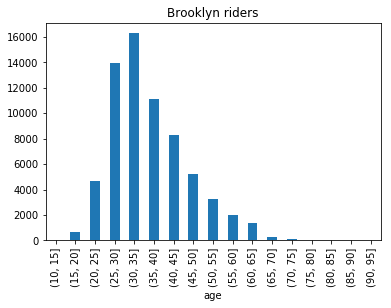

In [36]:
bins_2 = np.arange(10, 99, 5)
MN = Df_Manh.age.groupby(pd.cut(Df_Manh.age, bins_2)).agg([count_nonzero]).plot(kind='bar',legend=False)
MN.set_title("Manhattan riders")
BK = Df_Bkly.age.groupby(pd.cut(Df_Bkly.age, bins_2)).agg([count_nonzero]).plot(kind='bar',legend=False)
BK.set_title("Brooklyn riders");

Figure3. This is a histogram of Manhattan/Brooklyn citibike rider age distribution. The raw data is from citibike 2015 Feb and Aug. We could see that the distribution of those Manhattan/Brooklyn rider age duration have similar positive skewed trend while the Brooklyn one is more concentrate near the axis. 

          count_nonzero
age                    
(10, 15]       0.000000
(15, 20]       0.000253
(20, 25]       0.028327
(25, 30]       0.021638
(30, 35]       0.032058
(35, 40]       0.067352
(40, 45]       0.081383
(45, 50]       0.066510
(50, 55]       0.037355
(55, 60]       0.015634
(60, 65]       0.007581
(65, 70]       0.002331
(70, 75]       0.000415
(75, 80]       0.000178
(80, 85]       0.000039
(85, 90]       0.000013
(90, 95]       0.000000


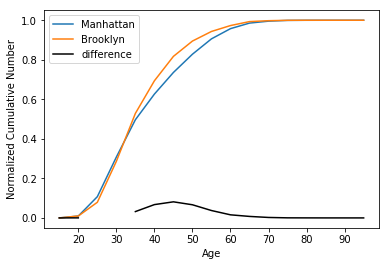

In [37]:
agM = Df_Manh.age.groupby(pd.cut(Df_Manh.age, bins_2)).agg([count_nonzero]).cumsum()

agB = Df_Bkly.age.groupby(pd.cut(Df_Bkly.age, bins_2)).agg([count_nonzero]).cumsum()

print (np.abs(agM / agM.max() - agB / agB.max()))

pl.plot(bins_2[:-1] + 5, agM / agM.max(), label = "Manhattan")
pl.plot(bins_2[:-1] + 5, agB / agB.max(), label = "Brooklyn")
pl.plot(bins_2[:-1] + 5, np.sqrt(agB / agB.max() - agM / agM.max())**2, 'k-',label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

Figure2. This chart shows the normalized Manhattan/Brooklyn citibike rider age cumulative distribution. It is clear that the difference between the distribution of them is generally very small. However, in the age range 30-50, there is a relative large difference between those two categories. 

#### Skeleton ipynb: 

"They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated.
Notice that there may be NaN values you are gonna have to deal with! You can do that for example with a Boolean statementsuch as df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...
lets run the scipy KS test"

###  2.1 KS test to compare 2 samples:

In [38]:
ks_2 = scipy.stats.ks_2samp(Df_Manh.age, Df_Bkly.age)
print (ks_2)

Ks_2sampResult(statistic=0.10363658760963446, pvalue=0.0)


### We got p-value = 0 which is smaller than 0.05. In this case, we COULD REJECT the Null hypothesis which is "There is NO statistical difference in the age distribution of bikers in Manhattan and Brooklyn"

## 2.2 Pearson's test for correlation

### H0: There is NO correlation between age distribution of bikers in Manhattan and Brooklyn
significance level α = 0.05

In [39]:
# scipy.stats.pearsonr(x , y) x,y should be the same length
len_min_2 = min(Df_Manh['age'].shape, Df_Bkly['age'].shape)
len_min_2 = len_min_2[0]

In [42]:
MN_reduced = np.sort(Df_Manh['age'].sample(n = len_min_2, axis = 0))
BK_reduced = np.sort(Df_Bkly['age'].sample(n = len_min_2, axis = 0))
pearson = scipy.stats.pearsonr(Day_reduced,Night_reduced)
pearson

(0.90923071952558199, 0.0)

### The correlation coefficient of Pearson's test is 0.90923, which indicate a strong positive linear relationship. The p value is 0.0 and we could reject our null hypothesis. 

## 2.3 Spearman's test for correlation

In [43]:
# scipy.stats.spearmanr(a, b=None, axis=0, nan_policy='propagate')
spearman = scipy.stats.spearmanr(MN_reduced,BK_reduced)
spearman

SpearmanrResult(correlation=0.99895682596111068, pvalue=0.0)

### The returned value is the correlation coefficient and the corresponding p-value. The correlation coefficient of Spearman's test almost 1, which indicate a strong positive linear relationship. The p value is 0.0 and we could reject our null hypothesis. 